<a href="https://colab.research.google.com/github/wjdolan/DS_Portfolio/blob/main/Loops_vs_Vectorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Vectorization**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from math import sin as sn
import math




In [31]:
a1 = np.random.randint(5,25,size=20)
l1 = a1.tolist()
l2=[]
speed = []
a2= []

In [21]:
math.log(1)

0.0

In [32]:

t1=time.time()
for item in l1:
    l2.append((math.log(item)))
    
t2 = time.time()
print('With for loop and appending it took {} seconds'.format(t2-t1))
speed.append(t2-t1)

With for loop and appending it took 9.632110595703125e-05 seconds


In [33]:
t1=time.time()
a2=np.log10(a1)
t2 = time.time()
print('With direct Numpy log10 method it took {} seconds'.format(t2-t1))
speed.append(t2-t1)

With direct Numpy log10 method it took 0.0016932487487792969 seconds


In [34]:
# Number of test points
N_point  = 1000

In [36]:
# Define a custom function with some if-else loops

def myfunc(x,y):
    if (x>0.5*y and y<0.3):
        return (sn(x-y))
    elif (x<0.5*y):
        return 0
    elif (x>0.2*y):
        return (2*sn(x+2*y))
    else:
        return (sn(y+x))

In [37]:
# List of stored elements, generated from a Normal distribution

lst_x = np.random.randn(N_point)
lst_y = np.random.randn(N_point)
lst_result = []

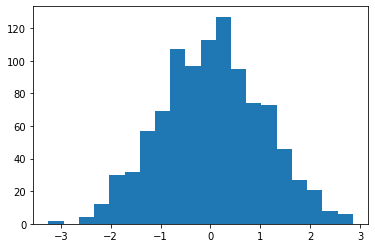

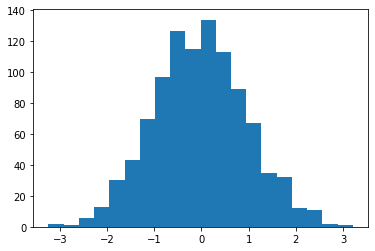

In [38]:
# Optional plots of the data

plt.hist(lst_x,bins=20)
plt.show()
plt.hist(lst_y,bins=20)
plt.show()

In [41]:
# First, plain vanilla for-loop

t1=time.time()
for i in range(len(lst_x)):
    x = lst_x[i]
    y= lst_y[i]
    if (x>0.5*y and y<0.3):
        lst_result.append(sn(x-y))
    elif (x<0.5*y):
        lst_result.append(0)
    elif (x>0.2*y):
        lst_result.append(2*sn(x+2*y))
    else:
        lst_result.append(sn(y+x))
t2=time.time()

print('Time taken by the plain vanilla for-loop—-{} us'.format(1000000*(t2-t1)))

Time taken by the plain vanilla for-loop—-3191.9479370117188 us


In [42]:
# List comprehension

print("Time taken by list comprehension and zip" + '-' *40)

%timeit lst_result = [myfunc(x,y) for x,y in zip(lst_x,lst_y)]

Time taken by list comprehension and zip----------------------------------------
1000 loops, best of 5: 574 µs per loop


In [43]:
# Map() function

print("Time taken by map function" + '-' *40)

%timeit list(map(myfunc,lst_x,lst_y))

Time taken by map function----------------------------------------
1000 loops, best of 5: 511 µs per loop


In [45]:
# Numpy.vectorize method

print("Time taken by numpy.vectorize method" + '-' *40)

vectfunc = np.vectorize(myfunc,otypes=[float],cache=False)

%timeit list(vectfunc(lst_x,lst_y))

Time taken by numpy.vectorize method----------------------------------------
The slowest run took 4.49 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 417 µs per loop
